# 一、导入必要的库

In [3]:
import time
import pandas as pd
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 二、爬取清河的房源信息，包括房价、租金以及面积

In [2]:
# 创建空列表
house_price_data = []

house_rent_data = []

In [3]:
# 设置Chrome浏览器驱动
service = Service(executable_path="C:\Program Files\chromedriver-win64\chromedriver.exe")  
driver = webdriver.Chrome(service=service)

# 设置等待时间，让页面加载
wait = WebDriverWait(driver, 10)

# 清河区的房价数据的url
price_url = "https://esf.fang.com/house-a015277-b02315/" 
driver.get(price_url)
time.sleep(3)  

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\周方健\AppData\Local\Temp\ipykernel_32584\3804075723.py:1: SyntaxWarning: invalid escape sequence '\P'
  service = Service(executable_path="C:\Program Files\chromedriver-win64\chromedriver.exe")


In [4]:
# 循环爬取前20页
for page in range(1, 21):
    print(f"正在爬取房价第{page}页...")
    # 等待房源信息加载
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "dl[dataflag]")))
    #找到所有房源信息的容器，并输出一页查找到的数量，验证
    house_list = driver.find_elements(By.CSS_SELECTOR, "dl[dataflag]")
    print(f"{page}找到 {len(house_list)} 条房源")

    # 循环爬取每一页的单个房源信息
    for house in house_list:
        try:
            # 提取含面积信息的一行文本
            area_element = house.find_element(By.CLASS_NAME, "tel_shop")
            area_text = area_element.text
           # 按"|"分割
            parts = area_text.split('|')
            area_value = None
            for part in parts:
                # 分割后找到含“㎡”的文本并提取出来
                if '㎡' in part:
                    area_value = part.split('㎡')[0].strip()
                    break
            if area_value:
                area = float(area_value)
            else:
                print("未找到面积信息")
                continue

            # 提取总价信息以及单价的信息
            total_price_span = house.find_element(By.CLASS_NAME, "price_right")
            # 获取总价数字
            total_price = total_price_span.find_element(By.TAG_NAME, "b").text

            # 将数据添加到列表
            house_price_data.append({
                'area': area,
                'total_price': total_price
            })
            
        except Exception as e:
            print(f"提取房价数据时出错: {e}")
            continue

    # 翻页逻辑
    try:
        next_page = driver.find_element(By.LINK_TEXT, "下一页")
        next_page.click()
        time.sleep(2)  
    except:
        print("没有找到下一页或已是最后一页")
        break

print(f"房价数据爬取完成，共获取{len(house_price_data)}条记录")

正在爬取房价第1页...
1找到 60 条房源
正在爬取房价第2页...
2找到 60 条房源
正在爬取房价第3页...
3找到 60 条房源
正在爬取房价第4页...
4找到 60 条房源
正在爬取房价第5页...
5找到 60 条房源
正在爬取房价第6页...
6找到 60 条房源
正在爬取房价第7页...
7找到 60 条房源
正在爬取房价第8页...
8找到 60 条房源
正在爬取房价第9页...
9找到 60 条房源
正在爬取房价第10页...
10找到 60 条房源
正在爬取房价第11页...
11找到 60 条房源
正在爬取房价第12页...
12找到 60 条房源
正在爬取房价第13页...
13找到 60 条房源
正在爬取房价第14页...
14找到 60 条房源
正在爬取房价第15页...
15找到 60 条房源
正在爬取房价第16页...
16找到 60 条房源
正在爬取房价第17页...
17找到 60 条房源
正在爬取房价第18页...
18找到 60 条房源
正在爬取房价第19页...
19找到 60 条房源
正在爬取房价第20页...
20找到 60 条房源
房价数据爬取完成，共获取1200条记录


In [5]:
service = Service(executable_path="C:\Program Files\chromedriver-win64\chromedriver.exe")  
driver = webdriver.Chrome(service=service)

wait = WebDriverWait(driver, 10)

rent_url = "https:/zu.fang.com/house-a015277-b02315/" 
driver.get(rent_url)
time.sleep(3)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\周方健\AppData\Local\Temp\ipykernel_32584\1793860784.py:1: SyntaxWarning: invalid escape sequence '\P'
  service = Service(executable_path="C:\Program Files\chromedriver-win64\chromedriver.exe")


In [6]:
# 循环爬取前20页
for page in range(1, 21):
    print(f"正在爬取租金第{page}页...")
    # 等待房源信息加载
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "list.hiddenMap.rel")))
    #找到所有房源信息的容器，并输出一页查找到的数量，验证
    house_list = driver.find_elements(By.CLASS_NAME, "list.hiddenMap.rel")
    print(f"{page}找到 {len(house_list)} 条房源")
    
    # 循环爬取每一页的单个房源信息
    for house in house_list:
        try:
            # 提取面积信息
            area_element = house.find_element(By.CLASS_NAME, "font15.mt12.bold")
            area_text = area_element.text
           # 按"|"分割
            parts = area_text.split('|')
            area_value = None
            for part in parts:
                # 分割后找到含“㎡”的文本并提取出来
                if '㎡' in part:
                    area_value = part.split('㎡')[0].strip()
                    break
            if area_value:
                area = float(area_value)
            else:
                print("未找到面积信息")
                continue

            # 提取租金信息
            rent_span = house.find_element(By.CLASS_NAME, "mt5.alingC")
            rent = rent_span.find_element(By.CLASS_NAME, "price").text

            # 将数据添加到列表
            house_rent_data.append({
                'area': area,
                'rent': rent
            })
            
        except Exception as e:
            print(f"提取租金数据时出错: {e}")
            continue

    # 翻页逻辑
    try:
        next_page = driver.find_element(By.LINK_TEXT, "下一页")
        next_page.click()
        time.sleep(2)  
    except:
        print("没有找到下一页或已是最后一页")
        break

print(f"租金数据爬取完成，共获取{len(house_rent_data)}条记录")

正在爬取租金第1页...
1找到 60 条房源
正在爬取租金第2页...
2找到 60 条房源
正在爬取租金第3页...
3找到 60 条房源
正在爬取租金第4页...
4找到 60 条房源
正在爬取租金第5页...
5找到 60 条房源
正在爬取租金第6页...
6找到 60 条房源
正在爬取租金第7页...
7找到 60 条房源
正在爬取租金第8页...
8找到 60 条房源
正在爬取租金第9页...
9找到 60 条房源
正在爬取租金第10页...
10找到 60 条房源
正在爬取租金第11页...
11找到 60 条房源
正在爬取租金第12页...
12找到 60 条房源
正在爬取租金第13页...
13找到 60 条房源
正在爬取租金第14页...
14找到 60 条房源
正在爬取租金第15页...
15找到 60 条房源
正在爬取租金第16页...
16找到 60 条房源
正在爬取租金第17页...
17找到 60 条房源
正在爬取租金第18页...
18找到 60 条房源
正在爬取租金第19页...
19找到 60 条房源
正在爬取租金第20页...
20找到 60 条房源
租金数据爬取完成，共获取1200条记录


In [7]:
driver.quit()

In [8]:
qinghe_esf=pd.DataFrame(house_price_data)
qinghe_rent=pd.DataFrame(house_rent_data)

In [17]:
qinghe_esf.head(10)

,area,total_price
0,125.54,1265
1,166.00,1195
2,180.00,1450
3,97.68,1098
4,237.70,2800
5,100.58,1288
6,144.37,1880
7,191.51,1950
8,237.70,2830
9,99.37,918


In [19]:
qinghe_rent.head(10)

,area,rent
0,85.0,6800
1,40.0,5000
2,18.0,2000
3,20.0,2000
4,10.0,1500
5,25.0,3600
6,12.0,1800
7,47.0,5000
8,186.0,45000
9,158.0,14500


In [1]:
qinghe_esf.to_parquet("qinghe_esf.parquet", index=False)
qinghe_rent.to_parquet("qinghe_rent.parquet", index=False)

NameError: name 'qinghe_esf' is not defined

# 三、导入必要的库和数据

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 四、导入和初步处理数据

In [190]:
qinghe_esf = pd.read_parquet("qinghe_esf.parquet")
qinghe_rent = pd.read_parquet("qinghe_rent.parquet")
shangdi_esf = pd.read_parquet("shangdi_esf.parquet")
shangdi_rent = pd.read_parquet("shangdi_zf.parquet")
xierqi_esf = pd.read_parquet("xierqi_esf.parquet")
xierqi_rent = pd.read_parquet("xierqi_rent.parquet")
xisanqi_esf = pd.read_parquet("西三旗房价数据.parquet")
xisanqi_rent = pd.read_parquet("西三旗租金数据.parquet")

In [192]:
print(shangdi_esf.head())
print(shangdi_rent.head())

                           title room_type area(m2) community_info  \
0      新增好房 客厅明亮 南北通透三居室 光线充足视野好      3室2厅    125.3           上地西里   
1                     4室2厅上第MOMA      4室2厅      191         上第MOMA   
2                     1室1厅上第MOMA      1室1厅   108.82         上第MOMA   
3          上地佳园,两梯两户,双卧朝南,满五,不临街      3室2厅   149.73           上地佳园   
4  (客户0)上第moma 3室2厅 146.25平 南北精装      3室2厅   146.25         上第MOMA   

              address_info total_price(万) avg_price(元/m2)  
0         上地 上地大厦西侧上地西里小区内           1099           87709  
1             上地 (海淀)安宁庄西路           1260           65968  
2             上地 (海淀)安宁庄西路            698           64142  
3  上地 上地东路与上地南路交汇处北行340米路东           1950          130234  
4             上地 (海淀)安宁庄西路           1068           73025  
             title room_type area(m2) community_info rent_price(元/月)
0     南北通透上地佳园4室3厅      4室3厅      314           上地东里           25500
1      2室1厅上地西里颂芳园      2室1厅      114           上地东里           10500
2      3室1厅上

In [194]:
print(xierqi_esf.head())
print(xierqi_rent.head())

    house_id  price/万    area   location
0  485145830    410.0   88.49  北京-海淀-西二旗
1  485507370   1539.0  225.44  北京-海淀-西二旗
2  485354241   2150.0  291.00  北京-海淀-西二旗
3  484760378   2760.0  294.70  北京-海淀-西二旗
4  485025955   1520.0  153.00  北京-海淀-西二旗
    house_id   rent/元   area   location
0  485518037   2400.0   18.0  北京-海淀-西二旗
1  485349147  15900.0  187.0  北京-海淀-西二旗
2  485349150   9500.0  107.0  北京-海淀-西二旗
3  485316400  15900.0  187.0  北京-海淀-西二旗
4  485314255  13000.0  152.0  北京-海淀-西二旗


In [196]:
print(xisanqi_esf.head())
print(xisanqi_rent.head())

                            title   price    area  \
0      奥森旁, 奥森ONE ,房子随带新风与地暖,无中阶费   620.0  115.00   
1  奥森旁, 奥森ONE ,房子随带新风与地暖,靓妆交房看房方便   860.0  139.00   
2   金隅翡丽铂庭(蓝爵堡),上叠别墅,豪华装修,社区新,环境好  1638.0  206.89   
3      金隅翡丽蓝爵堡 159平3居 南向精装修 视野无遮挡  1169.0  160.12   
4     枫丹丽舍 101.62平2居 南北向精装修 安静不临街   638.0  101.62   

                         location  
0                 奥森ONE\n西三旗 东小口镇  
1                 奥森ONE\n西三旗 东小口镇  
2  金隅翡丽蓝爵堡\n西三旗 西三旗建材城中路新都环岛北200米  
3  金隅翡丽蓝爵堡\n西三旗 西三旗建材城中路新都环岛北200米  
4            枫丹丽舍\n西三旗 西三旗建材城中路1号  
                          title    price   area        location
0  8号线5号线首推西三旗亚运村包取暖免费停车无杂费真图实价   3500.0   36.0   海淀-西三旗-极蜂空间公寓
1             4室2厅金隅翡丽铂庭三区(蓝爵堡)  19000.0  242.0  海淀-西三旗-金隅翡丽蓝爵堡
2         金隅翡丽华庭 4室2卫2厅 190平精装修  15000.0  190.0   海淀-西三旗-金隅翡丽华庭
3     金隅翡丽蓝爵堡 3室2卫1厅 132.11平精装修  14800.0  132.0  海淀-西三旗-金隅翡丽蓝爵堡
4                    3室2厅枫丹丽舍南区   9000.0  130.0     海淀-西三旗-枫丹丽舍


In [198]:
print(qinghe_esf.head())
print(qinghe_rent.head())

     area total_price
0  125.54        1265
1  166.00        1195
2  180.00        1450
3   97.68        1098
4  237.70        2800
   area  rent
0  85.0  6800
1  40.0  5000
2  18.0  2000
3  20.0  2000
4  10.0  1500


## 删除无关数据并初步处理

In [201]:
xierqi_esf= xierqi_esf.drop('house_id', axis=1)
xierqi_rent= xierqi_rent.drop('house_id', axis=1)

print(xierqi_esf.head())
print(xierqi_rent.head())

   price/万    area   location
0    410.0   88.49  北京-海淀-西二旗
1   1539.0  225.44  北京-海淀-西二旗
2   2150.0  291.00  北京-海淀-西二旗
3   2760.0  294.70  北京-海淀-西二旗
4   1520.0  153.00  北京-海淀-西二旗
    rent/元   area   location
0   2400.0   18.0  北京-海淀-西二旗
1  15900.0  187.0  北京-海淀-西二旗
2   9500.0  107.0  北京-海淀-西二旗
3  15900.0  187.0  北京-海淀-西二旗
4  13000.0  152.0  北京-海淀-西二旗


In [203]:
shangdi_esf= shangdi_esf.drop(['title', 'room_type', 'community_info', 'address_info'], axis=1)
shangdi_rent= shangdi_rent.drop(['title', 'room_type', 'community_info'], axis=1)

print(shangdi_esf.head())
print(shangdi_rent.head())

  area(m2) total_price(万) avg_price(元/m2)
0    125.3           1099           87709
1      191           1260           65968
2   108.82            698           64142
3   149.73           1950          130234
4   146.25           1068           73025
  area(m2) rent_price(元/月)
0      314           25500
1      114           10500
2      136           12900
3      125           11000
4      106           12000


In [205]:
# 将上地的表格中数值数据转化为浮点数，并删除Nah，
shangdi_esf_col = ['area(m2)', 'total_price(万)', 'avg_price(元/m2)']
for i in shangdi_esf_col :
    shangdi_esf[i] = pd.to_numeric(shangdi_esf[i], errors='coerce')
shangdi_esf = shangdi_esf.dropna(subset= shangdi_esf_col)

shangdi_rent_col = ['area(m2)', 'rent_price(元/月)']
for i in shangdi_rent_col :
    shangdi_rent[i] = pd.to_numeric(shangdi_rent[i], errors='coerce')
shangdi_rent = shangdi_rent.dropna(subset= shangdi_rent_col)


In [207]:
# 检查是否转化
print(shangdi_esf.head())
print(shangdi_rent.head())

   area(m2)  total_price(万)  avg_price(元/m2)
0    125.30          1099.0            87709
1    191.00          1260.0            65968
2    108.82           698.0            64142
3    149.73          1950.0           130234
4    146.25          1068.0            73025
   area(m2)  rent_price(元/月)
0       314            25500
1       114            10500
2       136            12900
3       125            11000
4       106            12000


In [209]:
print(shangdi_esf.dtypes)
print(shangdi_rent.dtypes)

area(m2)           float64
total_price(万)     float64
avg_price(元/m2)      int64
dtype: object
area(m2)           int64
rent_price(元/月)    int64
dtype: object


In [211]:
xisanqi_esf= xisanqi_esf.drop('title', axis=1)
xisanqi_rent= xisanqi_rent.drop('title', axis=1)

print(xisanqi_esf.head())
print(xisanqi_rent.head())

    price    area                        location
0   620.0  115.00                 奥森ONE\n西三旗 东小口镇
1   860.0  139.00                 奥森ONE\n西三旗 东小口镇
2  1638.0  206.89  金隅翡丽蓝爵堡\n西三旗 西三旗建材城中路新都环岛北200米
3  1169.0  160.12  金隅翡丽蓝爵堡\n西三旗 西三旗建材城中路新都环岛北200米
4   638.0  101.62            枫丹丽舍\n西三旗 西三旗建材城中路1号
     price   area        location
0   3500.0   36.0   海淀-西三旗-极蜂空间公寓
1  19000.0  242.0  海淀-西三旗-金隅翡丽蓝爵堡
2  15000.0  190.0   海淀-西三旗-金隅翡丽华庭
3  14800.0  132.0  海淀-西三旗-金隅翡丽蓝爵堡
4   9000.0  130.0     海淀-西三旗-枫丹丽舍


In [213]:
# 将清河的房价表格中数值数据转化为浮点数，并删除Nah，

qinghe_esf['total_price'] = pd.to_numeric(qinghe_esf['total_price'], errors='coerce')
qinghe_esf = qinghe_esf.dropna(subset= 'total_price')

qinghe_rent['rent'] = pd.to_numeric(qinghe_rent['rent'], errors='coerce')
qinghe_rent = qinghe_rent.dropna(subset= 'rent')

## 描述性统计

In [216]:
xisanqi_rent.rename(columns={'price': 'rent(元)'}, inplace=True)
xisanqi_esf.rename(columns={'price': 'price(万)'}, inplace=True)

print("西三旗房价数据描述性统计:")
print(xisanqi_esf.describe())
print("\n西三旗租金数据描述性统计:")
print(xisanqi_rent.describe())

西三旗房价数据描述性统计:
          price(万)         area
count  1196.000000  1196.000000
mean    678.172241   110.021764
std     487.007170    54.174431
min     190.000000    42.370000
25%     360.000000    73.700000
50%     524.000000    90.010000
75%     820.000000   133.000000
max    3500.000000   333.720000

西三旗租金数据描述性统计:
            rent(元)         area
count   1103.000000  1103.000000
mean    7402.008160    86.763373
std     8357.812127    78.040471
min     1000.000000     6.000000
25%     4600.000000    50.000000
50%     5600.000000    76.000000
75%     6745.000000    90.500000
max    58333.000000  1500.000000


In [218]:
qinghe_esf.rename(columns={'total_price': 'price(万)'}, inplace=True)
qinghe_rent.rename(columns={'rent': 'rent(元)'}, inplace=True)

print("清河房价数据描述性统计:")
print(qinghe_esf.describe())
print("\n清河租金数据描述性统计:")
print(qinghe_rent.describe())

清河房价数据描述性统计:
              area     price(万)
count  1200.000000  1200.000000
mean    137.179058  1412.362500
std      67.551872   818.434331
min      33.870000   199.000000
25%      89.200000   750.000000
50%     127.000000  1160.000000
75%     174.000000  1950.000000
max     478.150000  4300.000000

清河租金数据描述性统计:
              area        rent(元)
count  1200.000000    1200.000000
mean     80.888333   13197.585000
std      56.039327   60768.217165
min       6.000000    1000.000000
25%      51.000000    5200.000000
50%      70.000000    6500.000000
75%      98.000000    8800.000000
max     428.000000  800000.000000


In [220]:
shangdi_esf.rename(columns={'total_price(万)': 'price(万)' , 'area(m2)': 'area'}, inplace=True)
shangdi_rent.rename(columns={'area(m2)': 'area', 'rent_price(元/月)': 'rent(元)'}, inplace=True)

print("上地房价数据描述性统计:")
print(shangdi_esf.describe())
print("\n上地租金数据描述性统计:")
print(shangdi_rent.describe())

上地房价数据描述性统计:
              area     price(万)  avg_price(元/m2)
count  1198.000000  1198.000000      1198.000000
mean    113.223063   984.741068     89181.455760
std      42.388590   403.152234     23941.685838
min      36.690000   208.000000     34437.000000
25%      85.000000   751.250000     71581.000000
50%     111.570000   900.000000     84134.000000
75%     141.220000  1198.000000    105205.500000
max     314.710000  2980.000000    175519.000000

上地租金数据描述性统计:
              area       rent(元)
count  1080.000000   1080.000000
mean     83.385185   8148.134259
std      43.254123   3992.126546
min      10.000000   1000.000000
25%      55.000000   5500.000000
50%      85.000000   7350.000000
75%     110.000000  10500.000000
max     314.000000  25500.000000


In [222]:
xierqi_esf.rename(columns={'price/万': 'price(万)'}, inplace=True)
xierqi_rent.rename(columns={'rent/元': 'rent(元)'}, inplace=True)

print("西二旗房价数据描述性统计:")
print(xierqi_esf.describe())
print("\n西二旗租金数据描述性统计:")
print(xierqi_rent.describe())

西二旗房价数据描述性统计:
          price(万)        area
count   701.000000  701.000000
mean    897.039943  126.981669
std     646.190477   64.882820
min     239.000000   43.990000
25%     450.000000   86.300000
50%     710.000000  114.240000
75%    1120.000000  144.420000
max    3480.000000  371.030000

西二旗租金数据描述性统计:
            rent(元)        area
count    439.000000  439.000000
mean   10910.480638  101.387244
std    10532.254654   70.955259
min     1300.000000    8.000000
25%     5995.000000   62.000000
50%     7000.000000   83.000000
75%    11650.000000  136.000000
max    48000.000000  371.000000


## 检查异常值

In [224]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [252]:
# 创建DataFrame字典映射
block_esf_dict = {
    'xisanqi_esf': xisanqi_esf,
    'qinghe_esf': qinghe_esf,
    'shangdi_esf': shangdi_esf,
    'xierqi_esf': xierqi_esf
}

block_rent_dict = {
    'xisanqi_rent': xisanqi_rent,
    'qinghe_rent': qinghe_rent,
    'shangdi_rent': shangdi_rent,
    'xierqi_rent': xierqi_rent
}


In [254]:
# 循环
for esf_name, esf_df in block_esf_dict.items():
    # 检测房价异常值
    price_outliers, price_lower, price_upper = detect_outliers(esf_df, 'price(万)') 
    print(f"\n{esf_name}的房价异常值检测:")
    print(f"正常范围: {price_lower:.2f} - {price_upper:.2f}")
    print(f"发现 {len(price_outliers)} 个异常值")

for rent_name, rent_df in block_rent_dict.items():
    # 检测租金异常值
    rent_outliers, rent_lower, rent_upper = detect_outliers(rent_df, 'rent(元)')  
    print(f"\n{rent_name}的租金异常值检测:")
    print(f"正常范围: {rent_lower:.2f} - {rent_upper:.2f}")
    print(f"发现 {len(rent_outliers)} 个异常值")


xisanqi_esf的房价异常值检测:
正常范围: -330.00 - 1510.00
发现 90 个异常值

qinghe_esf的房价异常值检测:
正常范围: -1050.00 - 3750.00
发现 14 个异常值

shangdi_esf的房价异常值检测:
正常范围: 81.12 - 1868.12
发现 34 个异常值

xierqi_esf的房价异常值检测:
正常范围: -555.00 - 2125.00
发现 48 个异常值

xisanqi_rent的租金异常值检测:
正常范围: 1382.50 - 9962.50
发现 160 个异常值

qinghe_rent的租金异常值检测:
正常范围: -200.00 - 14200.00
发现 149 个异常值

shangdi_rent的租金异常值检测:
正常范围: -2000.00 - 18000.00
发现 28 个异常值

xierqi_rent的租金异常值检测:
正常范围: -2487.50 - 20132.50
发现 53 个异常值


## 计算单价

In [257]:
for esf_name, esf_df in block_esf_dict.items():
    # 计算房价单价（元/平方米）
    esf_df['avg_price(元/m2)'] = esf_df['price(万)'] * 10000 / esf_df['area']
    print(f"\n{esf_name}的房价表格前五行为:")
    print(esf_df.head())


xisanqi_esf的房价表格前五行为:
   price(万)    area                        location  avg_price(元/m2)
0     620.0  115.00                 奥森ONE\n西三旗 东小口镇     53913.043478
1     860.0  139.00                 奥森ONE\n西三旗 东小口镇     61870.503597
2    1638.0  206.89  金隅翡丽蓝爵堡\n西三旗 西三旗建材城中路新都环岛北200米     79172.507129
3    1169.0  160.12  金隅翡丽蓝爵堡\n西三旗 西三旗建材城中路新都环岛北200米     73007.744192
4     638.0  101.62            枫丹丽舍\n西三旗 西三旗建材城中路1号     62782.916749

qinghe_esf的房价表格前五行为:
     area  price(万)  avg_price(元/m2)
0  125.54      1265    100764.696511
1  166.00      1195     71987.951807
2  180.00      1450     80555.555556
3   97.68      1098    112407.862408
4  237.70      2800    117795.540597

shangdi_esf的房价表格前五行为:
     area  price(万)  avg_price(元/m2)
0  125.30    1099.0     87709.497207
1  191.00    1260.0     65968.586387
2  108.82     698.0     64142.620842
3  149.73    1950.0    130234.421960
4  146.25    1068.0     73025.641026

xierqi_esf的房价表格前五行为:
   price(万)    area   location  avg_price(元/m2)
0   

In [259]:
for rent_name, rent_df in block_rent_dict.items():
    # 计算租金单价（元/平方米/月）
    rent_df['avg_rent(元/m2/月)'] = rent_df['rent(元)'] / rent_df['area']
    print(f"\n{rent_name}的租金表格前五行为:")
    print(rent_df.head())


xisanqi_rent的租金表格前五行为:
   rent(元)   area        location  avg_rent(元/m2/月)
0   3500.0   36.0   海淀-西三旗-极蜂空间公寓         97.222222
1  19000.0  242.0  海淀-西三旗-金隅翡丽蓝爵堡         78.512397
2  15000.0  190.0   海淀-西三旗-金隅翡丽华庭         78.947368
3  14800.0  132.0  海淀-西三旗-金隅翡丽蓝爵堡        112.121212
4   9000.0  130.0     海淀-西三旗-枫丹丽舍         69.230769

qinghe_rent的租金表格前五行为:
   area  rent(元)  avg_rent(元/m2/月)
0  85.0     6800         80.000000
1  40.0     5000        125.000000
2  18.0     2000        111.111111
3  20.0     2000        100.000000
4  10.0     1500        150.000000

shangdi_rent的租金表格前五行为:
   area  rent(元)  avg_rent(元/m2/月)
0   314    25500         81.210191
1   114    10500         92.105263
2   136    12900         94.852941
3   125    11000         88.000000
4   106    12000        113.207547

xierqi_rent的租金表格前五行为:
   rent(元)   area   location  avg_rent(元/m2/月)
0   2400.0   18.0  北京-海淀-西二旗        133.333333
1  15900.0  187.0  北京-海淀-西二旗         85.026738
2   9500.0  107.0  北京-海淀-西二旗     

# 五、计算每个区块的房价租金比

In [262]:
# 计算每个区块的中位数房价租金比
block_ratios = {}

for block_name in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
    # 获取对应的数据
    esf_df = block_esf_dict[f'{block_name}_esf']
    rent_df = block_rent_dict[f'{block_name}_rent']
    
    # 计算中位数单价
    median_price_per_m2 = esf_df['avg_price(元/m2)'].median()
    median_rent_per_m2 = rent_df['avg_rent(元/m2/月)'].median()
    
    # 计算房价租金比
    # 公式：房价单价 / 月租金单价
    price_rent_ratio = median_price_per_m2 / median_rent_per_m2
    
    block_ratios[block_name] = price_rent_ratio
    print(f"{block_name}区块:")
    print(f"  中位数房价单价: {median_price_per_m2:.2f} 元/m²")
    print(f"  中位数租金单价: {median_rent_per_m2:.2f} 元/m²/月")
    print(f"  房价租金比: {price_rent_ratio:.2f}")
    print()

xisanqi区块:
  中位数房价单价: 58154.12 元/m²
  中位数租金单价: 80.00 元/m²/月
  房价租金比: 726.93

qinghe区块:
  中位数房价单价: 100514.95 元/m²
  中位数租金单价: 100.00 元/m²/月
  房价租金比: 1005.15

shangdi区块:
  中位数房价单价: 84134.62 元/m²
  中位数租金单价: 103.39 元/m²/月
  房价租金比: 813.76

xierqi区块:
  中位数房价单价: 65347.11 元/m²
  中位数租金单价: 97.00 元/m²/月
  房价租金比: 673.68



## 绘制Figure A

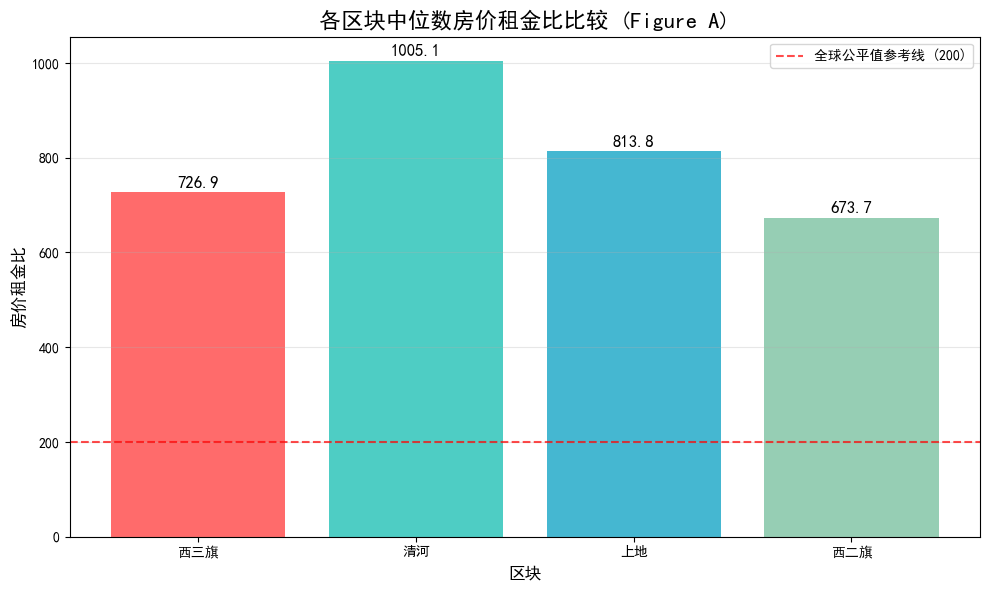

各区块房价租金比统计摘要:
西三旗: 726.9
清河: 1005.1
上地: 813.8
西二旗: 673.7

全球公平值参考: 约200


In [267]:
# 创建区块中文名称映射
block_names_cn = {
    'xisanqi': '西三旗',
    'qinghe': '清河', 
    'shangdi': '上地',
    'xierqi': '西二旗'
}

# 转换为DataFrame
ratio_df = pd.DataFrame({
    '区块': [block_names_cn[name] for name in block_ratios.keys()],
    '房价租金比': list(block_ratios.values())
})

# 绘制条形图
plt.figure(figsize=(10, 6))
bars = plt.bar(ratio_df['区块'], ratio_df['房价租金比'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])

# 添加数值标签
for bar, ratio in zip(bars, ratio_df['房价租金比']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=12)

# 添加参考线（全球平均值200）
plt.axhline(y=200, color='red', linestyle='--', alpha=0.7, label='全球公平值参考线 (200)')

plt.title('各区块中位数房价租金比比较 (Figure A)', fontsize=16, fontweight='bold')
plt.ylabel('房价租金比', fontsize=12)
plt.xlabel('区块', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 输出统计摘要
print("="*50)
print("各区块房价租金比统计摘要:")
print("="*50)
for block, ratio in block_ratios.items():
    cn_name = block_names_cn[block]
    print(f"{cn_name}: {ratio:.1f}")
print(f"\n全球公平值参考: 约200")

# 六、建模一

## 准备建模的数据（不打乱前面的数据，遂重新创建df）

In [271]:
# 合并所有区块的数据，并添加区块标签
model_data_esf = pd.DataFrame()
model_data_rent = pd.DataFrame()

for block_name in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
    # 房价数据
    esf_df = block_esf_dict[f'{block_name}_esf'].copy()
    esf_df['location'] = block_name
    esf_df = esf_df[['area', 'avg_price(元/m2)', 'location']]
    model_data_esf = pd.concat([model_data_esf, esf_df], ignore_index=True)
    
    # 租金数据
    rent_df = block_rent_dict[f'{block_name}_rent'].copy()
    rent_df['location'] = block_name
    rent_df = rent_df[['area', 'avg_rent(元/m2/月)', 'location']]
    model_data_rent = pd.concat([model_data_rent, rent_df], ignore_index=True)

# 重命名列以便建模
model_data_esf.columns = ['area', 'price_per_m2', 'location']
model_data_rent.columns = ['area', 'rent_per_m2', 'location']

print("房价建模数据前5行:")
print(model_data_esf.head())
print(f"\n房价数据形状: {model_data_esf.shape}")

print("\n租金建模数据前5行:")
print(model_data_rent.head())
print(f"\n租金数据形状: {model_data_rent.shape}")

房价建模数据前5行:
     area  price_per_m2 location
0  115.00  53913.043478  xisanqi
1  139.00  61870.503597  xisanqi
2  206.89  79172.507129  xisanqi
3  160.12  73007.744192  xisanqi
4  101.62  62782.916749  xisanqi

房价数据形状: (4295, 3)

租金建模数据前5行:
    area  rent_per_m2 location
0   36.0    97.222222  xisanqi
1  242.0    78.512397  xisanqi
2  190.0    78.947368  xisanqi
3  132.0   112.121212  xisanqi
4  130.0    69.230769  xisanqi

租金数据形状: (3822, 3)


## 创建虚拟变量并建模

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 为location创建虚拟变量
def prepare_features(df):
    """准备特征矩阵，包括面积和区块的虚拟变量"""
    X = df[['area']].copy()
    
    # 为每个区块创建虚拟变量
    for location in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
        X[f'location_{location}'] = (df['location'] == location).astype(int)
    
    return X

# 准备房价模型的特征和目标变量
X_price = prepare_features(model_data_esf)
y_price = model_data_esf['price_per_m2']

# 准备租金模型的特征和目标变量
X_rent = prepare_features(model_data_rent)
y_rent = model_data_rent['rent_per_m2']

print("房价模型特征矩阵前5行:")
print(X_price.head())
print(f"\n房价模型特征矩阵形状: {X_price.shape}")

print("\n租金模型特征矩阵前5行:")
print(X_rent.head())
print(f"\n租金模型特征矩阵形状: {X_rent.shape}")

房价模型特征矩阵前5行:
     area  location_xisanqi  location_qinghe  location_shangdi  \
0  115.00                 1                0                 0   
1  139.00                 1                0                 0   
2  206.89                 1                0                 0   
3  160.12                 1                0                 0   
4  101.62                 1                0                 0   

   location_xierqi  
0                0  
1                0  
2                0  
3                0  
4                0  

房价模型特征矩阵形状: (4295, 5)

租金模型特征矩阵前5行:
    area  location_xisanqi  location_qinghe  location_shangdi  location_xierqi
0   36.0                 1                0                 0                0
1  242.0                 1                0                 0                0
2  190.0                 1                0                 0                0
3  132.0                 1                0                 0                0
4  130.0                 1      

## 训练 Model 1 和 Model 2

In [277]:
# 训练 Model 1: 房价模型
model1 = LinearRegression()
model1.fit(X_price, y_price)

# 训练 Model 2: 租金模型
model2 = LinearRegression()
model2.fit(X_rent, y_rent)

# 输出模型系数
print("Model 1 (房价模型) 系数:")
print(f"截距 (β0): {model1.intercept_:.2f}")
feature_names = ['area'] + [f'location_{loc}' for loc in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']]
for i, coef in enumerate(model1.coef_):
    print(f"{feature_names[i]} (β{i+1}): {coef:.2f}")

print(f"\nModel 1 R²: {model1.score(X_price, y_price):.4f}")

print("\nModel 2 (租金模型) 系数:")
print(f"截距 (β0): {model2.intercept_:.2f}")
for i, coef in enumerate(model2.coef_):
    print(f"{feature_names[i]} (β{i+1}): {coef:.2f}")

print(f"\nModel 2 R²: {model2.score(X_rent, y_rent):.4f}")

Model 1 (房价模型) 系数:
截距 (β0): 68776.60
area (β1): 78.29
location_xisanqi (β2): -19012.29
location_qinghe (β3): 19875.66
location_shangdi (β4): 11540.99
location_xierqi (β5): -12404.36

Model 1 R²: 0.3981

Model 2 (租金模型) 系数:
截距 (β0): 102.50
area (β1): 0.09
location_xisanqi (β2): -19.92
location_qinghe (β3): 26.88
location_shangdi (β4): -2.81
location_xierqi (β5): -4.15

Model 2 R²: 0.0100


## 使用线性模型进行预测并计算房价租金比的预测值中位数

In [286]:
# 存储每个区块的预测房价和租金中位数
predicted_price_medians = {}
predicted_rent_medians = {}
predicted_ratios_by_block = {}

In [288]:
for block in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
    # 获取该区块的房价数据并预测
    block_esf_data = model_data_esf[model_data_esf['location'] == block]
    X_block_price = prepare_features(block_esf_data)
    predicted_prices = model1.predict(X_block_price)
    
    # 获取该区块的租金数据并预测
    block_rent_data = model_data_rent[model_data_rent['location'] == block]
    X_block_rent = prepare_features(block_rent_data)
    predicted_rents = model2.predict(X_block_rent)
    
    # 计算中位数
    median_predicted_price = np.median(predicted_prices)
    median_predicted_rent = np.median(predicted_rents)
    
    # 计算房价租金比
    price_rent_ratio = median_predicted_price / median_predicted_rent
    
    predicted_price_medians[block] = median_predicted_price
    predicted_rent_medians[block] = median_predicted_rent
    predicted_ratios_by_block[block] = price_rent_ratio
    
    print(f"{block_names_cn[block]}区块:")
    print(f"  预测房价单价中位数: {median_predicted_price:.2f} 元/m²")
    print(f"  预测租金单价中位数: {median_predicted_rent:.2f} 元/m²/月")
    print(f"  预测房价租金比: {price_rent_ratio:.1f}")
    print()

西三旗区块:
  预测房价单价中位数: 56811.21 元/m²
  预测租金单价中位数: 89.27 元/m²/月
  预测房价租金比: 636.4

清河区块:
  预测房价单价中位数: 98595.11 元/m²
  预测租金单价中位数: 135.54 元/m²/月
  预测房价租金比: 727.4

上地区块:
  预测房价单价中位数: 89052.43 元/m²
  预测租金单价中位数: 107.17 元/m²/月
  预测房价租金比: 830.9

西二旗区块:
  预测房价单价中位数: 65316.11 元/m²
  预测租金单价中位数: 105.66 元/m²/月
  预测房价租金比: 618.2



## 绘制Figure B

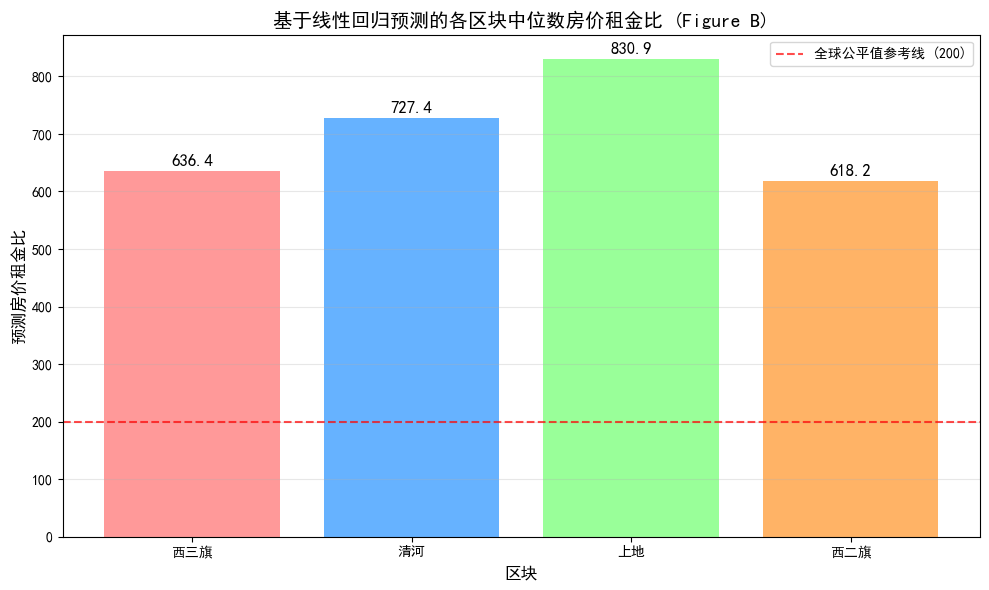

In [291]:
# 绘制 Figure B
plt.figure(figsize=(10, 6))
blocks_cn = [block_names_cn[block] for block in predicted_ratios_by_block.keys()]
ratios = list(predicted_ratios_by_block.values())

bars = plt.bar(blocks_cn, ratios, color=['#FF9999', '#66B2FF', '#99FF99', '#FFB366'])

# 添加数值标签
for bar, ratio in zip(bars, ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=12)

# 添加参考线
plt.axhline(y=200, color='red', linestyle='--', alpha=0.7, label='全球公平值参考线 (200)')

plt.title('基于线性回归预测的各区块中位数房价租金比 (Figure B)', fontsize=14, fontweight='bold')
plt.ylabel('预测房价租金比', fontsize=12)
plt.xlabel('区块', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 七、建模二

## 添加非线性特征和交互项

In [295]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 重新定义特征准备函数，包含更多特征
def prepare_advanced_features(df):
    """准备包含非线性特征和交互项的特征矩阵"""
    X = df[['area']].copy()
    
    # 添加非线性特征：面积的平方和对数
    X['area_squared'] = X['area'] ** 2
    X['area_log'] = np.log1p(X['area'])  # log(1+x) 避免对0取对数
    
    # 为每个区块创建虚拟变量
    for location in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
        location_dummy = (df['location'] == location).astype(int)
        X[f'location_{location}'] = location_dummy
        
        # 添加交互项：面积 × 地区
        X[f'area_{location}_interaction'] = X['area'] * location_dummy
        
        # 添加交互项：面积平方 × 地区
        X[f'area_squared_{location}_interaction'] = X['area_squared'] * location_dummy
    
    return X

# 准备高级特征
X_price_advanced = prepare_advanced_features(model_data_esf)
X_rent_advanced = prepare_advanced_features(model_data_rent)

print("高级房价模型特征矩阵前5行:")
print(X_price_advanced.head())
print(f"\n高级房价模型特征数量: {X_price_advanced.shape[1]}")
print("特征列表:", list(X_price_advanced.columns))

print("\n高级租金模型特征矩阵前5行:")
print(X_rent_advanced.head())
print(f"\n高级租金模型特征数量: {X_rent_advanced.shape[1]}")

高级房价模型特征矩阵前5行:
     area  area_squared  area_log  location_xisanqi  area_xisanqi_interaction  \
0  115.00    13225.0000  4.753590                 1                    115.00   
1  139.00    19321.0000  4.941642                 1                    139.00   
2  206.89    42803.4721  5.337009                 1                    206.89   
3  160.12    25638.4144  5.082149                 1                    160.12   
4  101.62    10326.6244  4.631033                 1                    101.62   

   area_squared_xisanqi_interaction  location_qinghe  area_qinghe_interaction  \
0                        13225.0000                0                      0.0   
1                        19321.0000                0                      0.0   
2                        42803.4721                0                      0.0   
3                        25638.4144                0                      0.0   
4                        10326.6244                0                      0.0   

   area_squ

## 使用多项式特征构建 Model 1+ 和 Model 2+

In [297]:
# 创建多项式特征管道
def create_polynomial_model(degree=2):
    """创建多项式回归模型"""
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])

# 训练 Model 1+ (房价高级模型)
model1_plus = create_polynomial_model(degree=2)
model1_plus.fit(X_price_advanced, y_price)

# 训练 Model 2+ (租金高级模型) 
model2_plus = create_polynomial_model(degree=2)
model2_plus.fit(X_rent_advanced, y_rent)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [299]:
# 使用 Model 1+ 和 Model 2+ 进行预测
predicted_price_medians_plus = {}
predicted_rent_medians_plus = {}
predicted_ratios_by_block_plus = {}

for block in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
    # 获取该区块的房价数据并预测
    block_esf_data = model_data_esf[model_data_esf['location'] == block]
    X_block_price_advanced = prepare_advanced_features(block_esf_data)
    predicted_prices_plus = model1_plus.predict(X_block_price_advanced)
    
    # 获取该区块的租金数据并预测
    block_rent_data = model_data_rent[model_data_rent['location'] == block]
    X_block_rent_advanced = prepare_advanced_features(block_rent_data)
    predicted_rents_plus = model2_plus.predict(X_block_rent_advanced)
    
    # 计算中位数
    median_predicted_price_plus = np.median(predicted_prices_plus)
    median_predicted_rent_plus = np.median(predicted_rents_plus)
    
    # 计算房价租金比
    price_rent_ratio_plus = median_predicted_price_plus / (median_predicted_rent_plus * 12)
    
    predicted_price_medians_plus[block] = median_predicted_price_plus
    predicted_rent_medians_plus[block] = median_predicted_rent_plus
    predicted_ratios_by_block_plus[block] = price_rent_ratio_plus
    
    print(f"{block_names_cn[block]}区块 (高级模型):")
    print(f"  预测房价单价中位数: {median_predicted_price_plus:.2f} 元/m²")
    print(f"  预测租金单价中位数: {median_predicted_rent_plus:.2f} 元/m²/月")
    print(f"  预测房价租金比: {price_rent_ratio_plus:.1f}")
    print()

西三旗区块 (高级模型):
  预测房价单价中位数: 54890.44 元/m²
  预测租金单价中位数: 84.13 元/m²/月
  预测房价租金比: 54.4

清河区块 (高级模型):
  预测房价单价中位数: 98195.26 元/m²
  预测租金单价中位数: 108.56 元/m²/月
  预测房价租金比: 75.4

上地区块 (高级模型):
  预测房价单价中位数: 86110.00 元/m²
  预测租金单价中位数: 97.59 元/m²/月
  预测房价租金比: 73.5

西二旗区块 (高级模型):
  预测房价单价中位数: 63725.11 元/m²
  预测租金单价中位数: 99.68 元/m²/月
  预测房价租金比: 53.3



## 使用高级模型预测并计算房价租金比

In [305]:
# 使用 Model 1+ 和 Model 2+ 进行预测
predicted_price_medians_plus = {}
predicted_rent_medians_plus = {}
predicted_ratios_by_block_plus = {}

for block in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
    # 获取该区块的房价数据并预测
    block_esf_data = model_data_esf[model_data_esf['location'] == block]
    X_block_price_advanced = prepare_advanced_features(block_esf_data)
    predicted_prices_plus = model1_plus.predict(X_block_price_advanced)
    
    # 获取该区块的租金数据并预测
    block_rent_data = model_data_rent[model_data_rent['location'] == block]
    X_block_rent_advanced = prepare_advanced_features(block_rent_data)
    predicted_rents_plus = model2_plus.predict(X_block_rent_advanced)
    
    # 计算中位数
    median_predicted_price_plus = np.median(predicted_prices_plus)
    median_predicted_rent_plus = np.median(predicted_rents_plus)
    
    # 计算房价租金比
    price_rent_ratio_plus = median_predicted_price_plus / (median_predicted_rent_plus * 12)
    
    predicted_price_medians_plus[block] = median_predicted_price_plus
    predicted_rent_medians_plus[block] = median_predicted_rent_plus
    predicted_ratios_by_block_plus[block] = price_rent_ratio_plus
    
    print(f"{block_names_cn[block]}区块 (高级模型):")
    print(f"  预测房价单价中位数: {median_predicted_price_plus:.2f} 元/m²")
    print(f"  预测租金单价中位数: {median_predicted_rent_plus:.2f} 元/m²/月")
    print(f"  预测房价租金比: {price_rent_ratio_plus:.1f}")
    print()

西三旗区块 (高级模型):
  预测房价单价中位数: 54890.44 元/m²
  预测租金单价中位数: 84.13 元/m²/月
  预测房价租金比: 54.4

清河区块 (高级模型):
  预测房价单价中位数: 98195.26 元/m²
  预测租金单价中位数: 108.56 元/m²/月
  预测房价租金比: 75.4

上地区块 (高级模型):
  预测房价单价中位数: 86110.00 元/m²
  预测租金单价中位数: 97.59 元/m²/月
  预测房价租金比: 73.5

西二旗区块 (高级模型):
  预测房价单价中位数: 63725.11 元/m²
  预测租金单价中位数: 99.68 元/m²/月
  预测房价租金比: 53.3



## 绘制Figure C

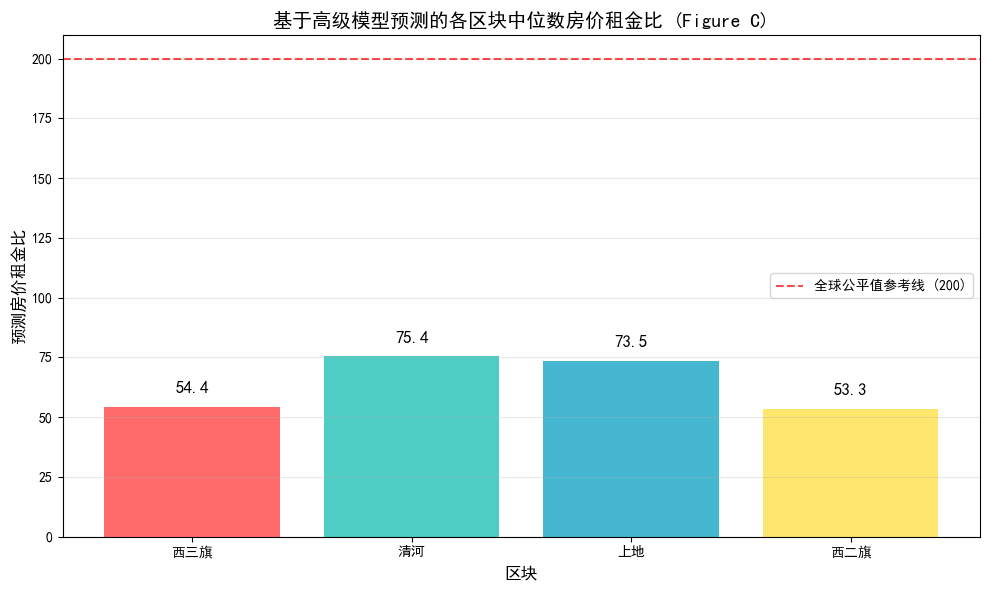

In [308]:
# 绘制 Figure C
plt.figure(figsize=(10, 6))
blocks_cn = [block_names_cn[block] for block in predicted_ratios_by_block_plus.keys()]
ratios_plus = list(predicted_ratios_by_block_plus.values())

bars = plt.bar(blocks_cn, ratios_plus, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFE66D'])

# 添加数值标签
for bar, ratio in zip(bars, ratios_plus):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=12)

# 添加参考线
plt.axhline(y=200, color='red', linestyle='--', alpha=0.7, label='全球公平值参考线 (200)')

plt.title('基于高级模型预测的各区块中位数房价租金比 (Figure C)', fontsize=14, fontweight='bold')
plt.ylabel('预测房价租金比', fontsize=12)
plt.xlabel('区块', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 八、三种方法比较

In [311]:
# 汇总三种方法的结果
print("\n" + "="*70)
print("三种方法房价租金比比较")
print("="*70)

# 重新获取直接计算的结果
direct_ratios = {}
for block_name in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
    esf_df = block_esf_dict[f'{block_name}_esf']
    rent_df = block_rent_dict[f'{block_name}_rent']
    median_price = esf_df['avg_price(元/m2)'].median()
    median_rent = rent_df['avg_rent(元/m2/月)'].median()
    direct_ratio = median_price / (median_rent * 12)
    direct_ratios[block_name] = direct_ratio

# 创建比较表格
comparison_data = []
for block in ['xisanqi', 'qinghe', 'shangdi', 'xierqi']:
    cn_name = block_names_cn[block]
    direct = direct_ratios[block]
    linear = predicted_ratios_by_block[block]
    advanced = predicted_ratios_by_block_plus[block]
    
    comparison_data.append({
        '区块': cn_name,
        '直接计算': direct,
        '线性回归': linear, 
        '高级模型': advanced,
        '样本量_房价': len(model_data_esf[model_data_esf['location'] == block]),
        '样本量_租金': len(model_data_rent[model_data_rent['location'] == block])
    })

comparison_df = pd.DataFrame(comparison_data)

print(comparison_df.to_string(index=False, float_format='%.1f'))

# 计算各方法的平均绝对偏差
def calculate_mad(values):
    """计算平均绝对偏差"""
    median_val = np.median(values)
    return np.mean(np.abs(values - median_val))

direct_mad = calculate_mad(comparison_df['直接计算'])
linear_mad = calculate_mad(comparison_df['线性回归']) 
advanced_mad = calculate_mad(comparison_df['高级模型'])

print(f"\n各方法的离散程度(平均绝对偏差):")
print(f"  直接计算: {direct_mad:.2f}")
print(f"  线性回归: {linear_mad:.2f}")
print(f"  高级模型: {advanced_mad:.2f}")


三种方法房价租金比比较
 区块  直接计算  线性回归  高级模型  样本量_房价  样本量_租金
西三旗  60.6 636.4  54.4    1196    1103
 清河  83.8 727.4  75.4    1200    1200
 上地  67.8 830.9  73.5    1198    1080
西二旗  56.1 618.2  53.3     701     439

各方法的离散程度(平均绝对偏差):
  直接计算: 8.71
  线性回归: 75.96
  高级模型: 10.32
